7
           b         m         MSE       dMSE_db       dMSE_dm
0   0.000000  0.500000  209.678571 -2.642857e+01 -1.321429e+01
1   0.264286  0.632143  189.480940 -2.499388e+01 -1.579970e+01
2   0.514224  0.790140  168.314334 -2.341059e+01 -1.849764e+01
3   0.748330  0.975116  146.515115 -2.167397e+01 -2.113464e+01
4   0.965070  1.186463  124.619669 -1.979126e+01 -2.348159e+01
..       ...       ...         ...           ...           ...
95  2.176537  3.719343   11.806854 -1.562550e-11 -5.811618e-11
96  2.176537  3.719343   11.806854 -1.132694e-11 -4.212808e-11
97  2.176537  3.719343   11.806854 -8.210765e-12 -3.053913e-11
98  2.176537  3.719343   11.806854 -5.951240e-12 -2.213518e-11
99  2.176537  3.719343   11.806854 -4.314993e-12 -1.604850e-11

[100 rows x 5 columns]


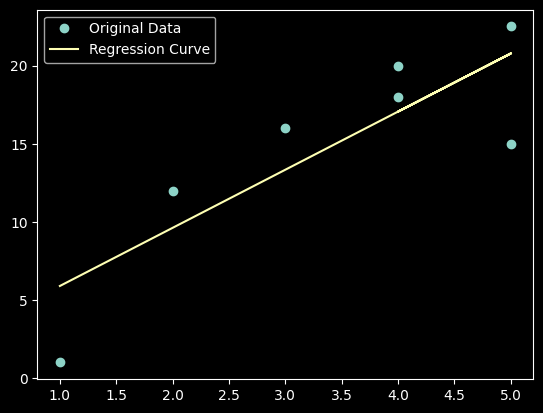

In [53]:
### IMPORT
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns #for colors 
colors=sns.light_palette('seagreen', 3) 
plt.style.use('dark_background') # for customizing theme

#data 
[xs, ys] = [[1,2,3,4,5,4,5] , [1, 12, 16, 18, 22.5, 20, 15]] 

#Hyperparameter
Learning_rate = 0.01 
epochs = range(0,100) 

#Starting Values: 
prev_db = 0;  dMSE_db = 0; 
b = 0; m = 0.5 #Gewichte sind ungleich 0

#Variables
y_regression = [] 
prev_MSE = 0
liste=[]
column_names = ['b', 'm', 'MSE', 'dMSE_db', 'dMSE_dm']

#Funktionen
def linear_function (X, M, B): 
    Y=M*float(X)+B 
    return Y

for k in epochs:
    dMSE_db = 0
    dMSE_dm = 0
    MSE = 0
    for i in range(0,len(xs)): 
        dMSE_db = dMSE_db - 2/len(xs) * (ys[i] - m*xs[i] - b)
        dMSE_dm = dMSE_dm - 2*m/len(xs) * (ys[i] - m*xs[i] - b)   
        y = linear_function(xs[i], m, b) 
        MSE=MSE + 1/len(xs)*(y-ys[i])**2

    new_row = [b, m, MSE,  dMSE_db, dMSE_dm]
    liste.append(new_row) 

    Stepsize_b = Learning_rate * dMSE_db #dmse_db ist zu klein 
    b = b - Stepsize_b
    Stepsize_m = Learning_rate * dMSE_dm #dmse_db ist zu klein 
    m = m - Stepsize_m    

print(len(xs))
df=pd.DataFrame(liste, columns=column_names)
print(df)

### PLOTTEN ### 

plt.plot(xs, ys, 'o', label="Original Data") 
for i in range(0,len(xs)): 
    y_regression.append(linear_function(xs[i], m, b)) 
plt.plot(xs, y_regression, label="Regression Curve") 
plt.legend() 
plt.show()

### Hier gibt es keinen Optimizer der die Funktion zum Minimum führt. Bam. Den müsste ich als nächstes programmieren. 

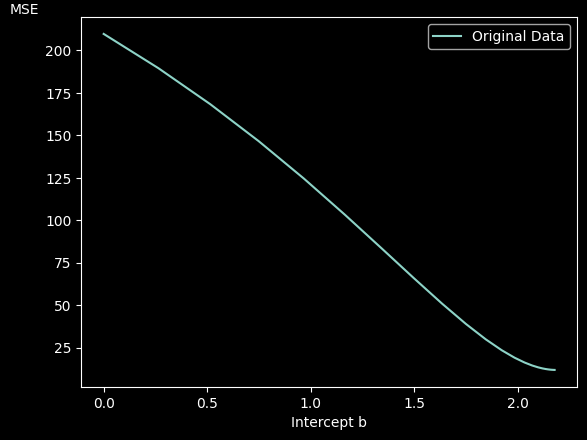

In [54]:
### PLOTTEN ### 

plt.plot(list(df['b']), list(df['MSE']) , label="Original Data")
plt.xlabel('Intercept b', loc='center')
plt.ylabel('MSE', rotation=0, loc='top') 
plt.legend() 
plt.show()

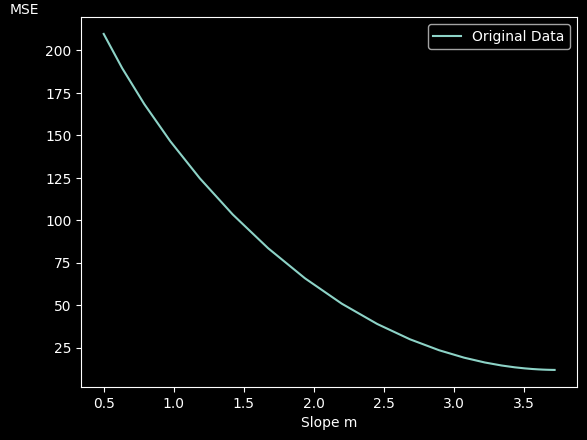

In [55]:
plt.plot(list(df['m']), list(df['MSE']), label="Original Data")
plt.legend() 
plt.xlabel('Slope m', loc='center')
plt.ylabel('MSE', rotation=0, loc='top')
plt.show()